___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.13


In [2]:
#pip install tensorflow

In [3]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [7]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [8]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


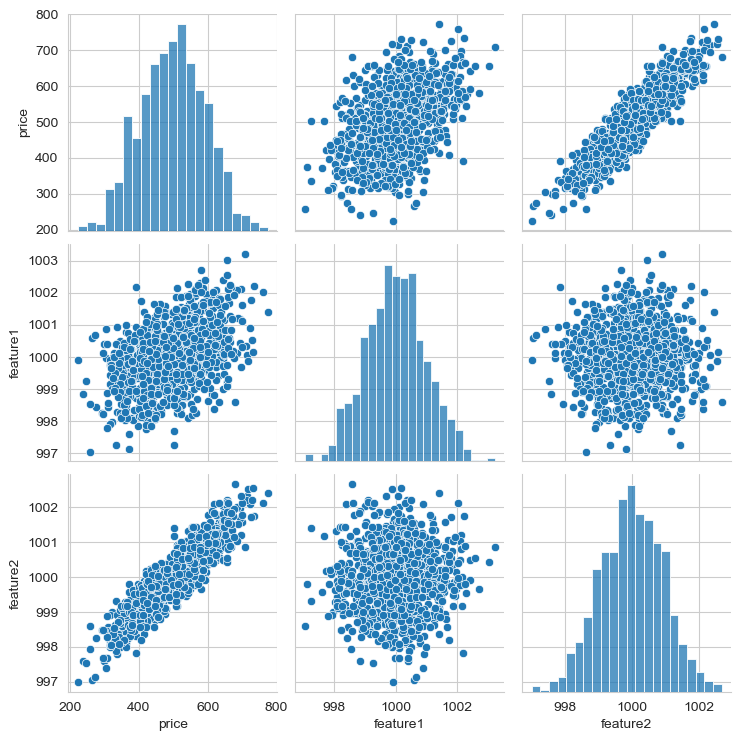

In [11]:
sns.pairplot(df);

In [12]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values

In [15]:
X = df[['feature1', 'feature2']] 
y = df['price']

In [16]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [17]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
X_train.shape

(700, 2)

In [20]:
X_test.shape

(300, 2)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [25]:
import tensorflow as tf

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [27]:
# help(Sequential)

In [28]:
# help(Dense)

In [29]:
X_train.shape

(700, 2)

In [30]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [31]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.42178655, -0.8252635 ,  0.6323354 ,  0.49813223],
        [-0.3147695 ,  0.32166147, -0.29462838, -0.43074226]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.48151156, -0.16039348, -0.4090073 ,  0.5172078 ],
        [-0.41297993,  0.29274982,  0.26818782,  0.33366054],
        [ 0.33297604,  0.56904525,  0.16383046, -0.24787176],
        [ 0.36022252, -0.7123162 ,  0.32849425,  0.19970804]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.57433933, -0.18274415,  0.84963864, -0.1765176 ],
        [ 0.28738993, -0.05151278,  0.34488457, -0.40945598],
        [-0.61423695,  0.86556643,  0.4900

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [34]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [35]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 2s 3ms/step - loss: 256557.3438
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256344.2344
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 256098.7188
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 255805.3438
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 255451.1250
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255026.1875
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 254521.6250
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 253934.5156
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 253247.4219
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 252451.2188
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 251538.0156
Epoch 12/250
22/22 [==============================] - 0s 4ms/st

22/22 [==============================] - 0s 2ms/step - loss: 913.4502
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 874.0522
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 836.3837
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 806.1236
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 769.5367
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 733.8755
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 702.6961
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 669.4742
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 636.9260
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 605.3981
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 576.1213
Epoch 108/250
22/22 [==============================] - 0s 4ms/step - loss: 547.0398
Epoch 10

22/22 [==============================] - 0s 2ms/step - loss: 24.8794
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4127
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2990
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 24.3583
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4082
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 24.9136
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5535
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7597
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 24.3633
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4517
Epoch 205/250
22/22 [==============================] - 0s 2ms/step - loss: 24.3395
Epoch 206/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7978
Epoch 207/250
22/2

In [36]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.42178655,  0.26082394,  1.7215444 ,  1.5921894 ],
        [-0.3147695 ,  2.792455  ,  2.1825163 ,  2.0547311 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0.        , 0.45692578, 0.46280998, 0.4688519 ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.48151156, -0.16039348, -0.4090073 ,  0.5172078 ],
        [ 1.3605453 ,  2.033974  ,  2.0317743 ,  0.21379046],
        [ 1.7855271 ,  2.025013  ,  1.6186459 , -0.33432972],
        [ 1.7857941 ,  0.7198759 ,  1.7538502 ,  0.14042251]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.446565  ,  0.44871455,  0.44942024, -0.11490292], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.0073464 ,  1.251335  ,  2.2879655 ,  1.2589242 ],
        [ 1.7719818 ,  1.4340777 ,  

In [37]:
model.history.history

{'loss': [256557.34375,
  256344.234375,
  256098.71875,
  255805.34375,
  255451.125,
  255026.1875,
  254521.625,
  253934.515625,
  253247.421875,
  252451.21875,
  251538.015625,
  250498.21875,
  249326.78125,
  248000.046875,
  246519.765625,
  244870.859375,
  243041.828125,
  241026.28125,
  238804.53125,
  236378.125,
  233730.859375,
  230848.5,
  227721.78125,
  224349.03125,
  220705.9375,
  216813.640625,
  212635.296875,
  208189.03125,
  203449.734375,
  198407.9375,
  193080.0625,
  187475.203125,
  181579.53125,
  175377.546875,
  168904.5625,
  162148.359375,
  155155.640625,
  147906.640625,
  140447.765625,
  132665.0625,
  124718.8125,
  116630.9921875,
  108440.09375,
  100109.6484375,
  91756.359375,
  83340.703125,
  74974.0078125,
  66691.8203125,
  58591.22265625,
  50710.83984375,
  43115.87890625,
  35894.0546875,
  29198.5859375,
  23056.04296875,
  17535.67578125,
  12761.7861328125,
  8812.5498046875,
  5837.66943359375,
  3913.701904296875,
  2884.005371

In [38]:
pd.DataFrame(model.history.history)

,loss
0,256557.344
1,256344.234
2,256098.719
3,255805.344
4,255451.125
...,...
245,24.892
246,24.396
247,24.406
248,24.575


In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

<AxesSubplot:>

In [40]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

(0.0, 3000.0)

## Model Performance

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
model.evaluate(X_train, y_train, verbose=0)

24.563404083251953

In [43]:
model.evaluate(X_test, y_test, verbose=0)

25.191844940185547

In [44]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 2ms/step


(300, 1)

In [45]:
y_test.shape

(300,)

In [46]:
y_pred.reshape(-1,).shape

(300,)

In [47]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
211,504.694,498.724
679,466.000,465.476
713,387.646,389.831
59,397.882,394.837
481,595.854,594.728
948,433.423,437.170
136,451.804,446.923
554,506.339,512.810
107,357.342,360.669
260,275.333,280.829


In [48]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

<AxesSubplot:title={'center':'loss - epoch graph'}, xlabel='epoch', ylabel='loss'>

In [49]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [50]:
eval_metric(y_test, y_pred)

r2_score: 0.9971346970802638 
mae: 4.016953068798935 
mse: 25.191834001320043 
rmse: 5.0191467403653425


## Final Model and Model Deployment

### Final Model Training

In [51]:
scaler = MinMaxScaler().fit(X)

In [52]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [53]:
X_scaled = scaler.transform(X)

In [54]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 257391.8750
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 257316.1406
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 257228.4688
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 257124.4531
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 257000.7500
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 256855.5469
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 256685.5781
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 256486.5781
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 256257.3594
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 255994.4375
Epoch 11/250
32/32 [==============================] - 0s 3ms/step - loss: 255693.4531
Epoch 12/250
32/32 [==============================] - 0s 3ms/st

Epoch 97/250
32/32 [==============================] - 0s 2ms/step - loss: 1656.5022
Epoch 98/250
32/32 [==============================] - 0s 2ms/step - loss: 1624.8160
Epoch 99/250
32/32 [==============================] - 0s 2ms/step - loss: 1593.9076
Epoch 100/250
32/32 [==============================] - 0s 2ms/step - loss: 1563.5303
Epoch 101/250
32/32 [==============================] - 0s 2ms/step - loss: 1530.0557
Epoch 102/250
32/32 [==============================] - 0s 2ms/step - loss: 1497.7169
Epoch 103/250
32/32 [==============================] - 0s 2ms/step - loss: 1464.4078
Epoch 104/250
32/32 [==============================] - 0s 2ms/step - loss: 1437.6519
Epoch 105/250
32/32 [==============================] - 0s 2ms/step - loss: 1409.9944
Epoch 106/250
32/32 [==============================] - 0s 2ms/step - loss: 1379.6920
Epoch 107/250
32/32 [==============================] - 0s 2ms/step - loss: 1349.9973
Epoch 108/250
32/32 [==============================] - 0s 2ms/step -

32/32 [==============================] - 0s 3ms/step - loss: 26.7058
Epoch 195/250
32/32 [==============================] - 0s 3ms/step - loss: 26.1120
Epoch 196/250
32/32 [==============================] - 0s 3ms/step - loss: 26.2518
Epoch 197/250
32/32 [==============================] - 0s 3ms/step - loss: 25.7627
Epoch 198/250
32/32 [==============================] - 0s 2ms/step - loss: 25.5179
Epoch 199/250
32/32 [==============================] - 0s 2ms/step - loss: 25.2135
Epoch 200/250
32/32 [==============================] - 0s 2ms/step - loss: 25.1467
Epoch 201/250
32/32 [==============================] - 0s 3ms/step - loss: 24.9908
Epoch 202/250
32/32 [==============================] - 0s 2ms/step - loss: 24.8816
Epoch 203/250
32/32 [==============================] - 0s 3ms/step - loss: 24.9244
Epoch 204/250
32/32 [==============================] - 0s 6ms/step - loss: 24.8100
Epoch 205/250
32/32 [==============================] - 0s 5ms/step - loss: 24.7239
Epoch 206/250
32/3

In [55]:
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [56]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [57]:
#final_model.save("model_fake_reg") 

### Loading Model

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model_fake_reg = load_model('model_fake_reg.h5')

In [60]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [61]:
sample = [[998, 1000]]

In [62]:
sample_scaled = scaler_fake_reg.transform(sample)

In [63]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 97ms/step


array([[418.75403]], dtype=float32)

## Prediction-2

In [64]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [65]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [66]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [67]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 25ms/step


array([[378.71152],
       [330.4119 ],
       [282.11224],
       [233.81262],
       [185.513  ]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___